In [4]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.summarystats as ds
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%run ../DDELFI.py

from delfi.simulator.Gauss import Gauss


n_params = 3
seed = 42

n_cores = 4

mlist = [ Gauss(dim=n_params, seed=seed + i, noise_cov=1.) for i in range(n_cores) ]

p = dd.Gaussian(m=0.*np.ones(n_params), 
                S=1.*np.eye(n_params),
                seed=seed)
s = ds.Identity()
g = dg.MPGenerator(models=mlist, prior=p, summary=s)

obs = 0.8 * np.ones((1,n_params))

def calc_posterior(obs,
                   n_summary=3,
                   prior_mu=0.*np.ones(n_params),
                   prior_cov=np.atleast_2d(1.*np.eye(n_params)),
                   noise_cov=np.atleast_2d(1.*np.eye(n_params))):
    posterior_mu = obs[0]
    posterior_cov = noise_cov
    return dd.Gaussian(m=posterior_mu, S=posterior_cov)

posterior = calc_posterior(obs)
print('Analytical solution')
print(posterior.m)
print(posterior.S)

Analytical solution
[ 0.8  0.8  0.8]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Process Worker-8:
Process Worker-7:
Process Worker-5:
Process Worker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/kaan/delfi/delfi/generator/MPGenerator.py", line 29, in run
    params_batch = self.conn.recv()
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/kaan/delfi/delfi/generator/MPGenerator.py", line 29, in run
    params_batch = self.conn.recv()
  File "/Users/kaan/delfi/delfi/generator/MPGenerator.py", line 29, in run
    params_batch = self.conn.recv()
  File 

In [51]:
# DDELFI

res = DDELFI(g, obs=obs, n_hiddens=[10], seed=seed)
log, trn_data, posteriors, _ = res.run(10000, n_rounds=3, lr=0.001, epochs=1000, mog_es_rounds=1000, mog_nsteps=-1)

print('DDELFI solution')
posterior = posteriors[-1]
print(posterior.xs[0].m)
print(posterior.xs[0].S)

print('DDELFI solution if the prior was the proposal prior (wrong solution)')
posterior_uncorrected = super(DDELFI, res).predict(obs)
print(posterior_uncorrected.xs[0].m)
print(posterior_uncorrected.xs[0].S)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

KeyboardInterrupt: 

In [9]:
%run ../demos/lotka-volterra/run_abc.py

samples, lweights, _, _ = run_smc(mlist, p, s, obs, n_params=n_params, eps_last=0.15, eps_decay=0.8, n_particles=300)

iteration = 0, eps = 2.0, ess = 100.00%
iteration = 1, eps = 1.6, ess = 60.30%
iteration = 2, eps = 1.3, ess = 43.52%
iteration = 3, eps = 1.0, ess = 70.00%
iteration = 4, eps = 0.82, ess = 48.76%
iteration = 5, eps = 0.66, ess = 63.31%
iteration = 6, eps = 0.52, ess = 43.05%
iteration = 7, eps = 0.42, ess = 71.30%
iteration = 8, eps = 0.34, ess = 47.30%
iteration = 9, eps = 0.27, ess = 66.87%


Process Worker-27:
Process Worker-28:
Traceback (most recent call last):
Process Worker-25:
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Worker-26:
Traceback (most recent call last):
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/kaan/delfi/delfi/generator/MPGenerator.py", line 29, in run
    params_batch = self.conn.recv()
Traceback (most recent call last):
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/kaan/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk =

KeyboardInterrupt: 

In [ ]:
from delfi.utils.viz import plot_pdf

plot_pdf(calc_posterior(obs), samples=samples[-1])

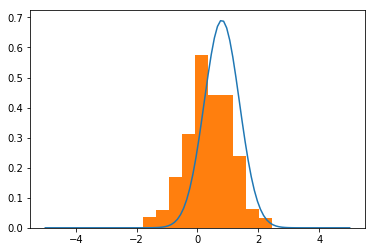

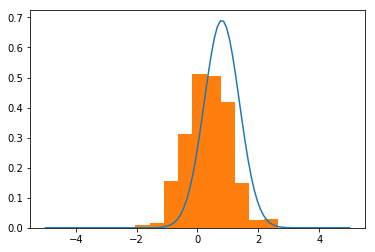

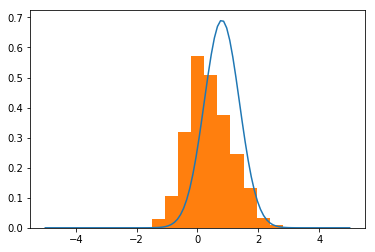

In [48]:
import matplotlib.pyplot as plt

xlist = np.linspace(-5, 5, 100)

for ax in range(n_params):
    ylist = calc_posterior(obs).eval(xlist, ii=[ax], log=False)

    plt.plot(xlist, ylist)
    plt.hist(samples[-1][:,ax], weights=np.exp(lweights[-1]), normed=True)

    plt.show()